<a href="https://colab.research.google.com/github/Gbell26/Tensor_Flow2.0_Course/blob/main/CNN_Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print(x_train.shape)


4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)


In [ ]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
K = len(set(y_train))
print("number of classes: ", K)

number of classes:  10


In [ ]:
i = tf.keras.Input(shape=x_train[0].shape)
x = tf.keras.layers.Conv2D(32,(3,3),strides=2,activation='relu')(i)
x = tf.keras.layers.Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = tf.keras.layers.Conv2D(128,(3,3),strides=2,activation='relu')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512,activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(K,activation='softmax')(x)

model = tf.keras.Model(i,x)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
r = model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 18s 9ms/step - loss: 0.5243 - accuracy: 0.8061 - val_loss: 0.3948 - val_accuracy: 0.8523
Epoch 2/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3629 - accuracy: 0.8638 - val_loss: 0.3523 - val_accuracy: 0.8667
Epoch 3/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3125 - accuracy: 0.8811 - val_loss: 0.3315 - val_accuracy: 0.8755
Epoch 4/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2806 - accuracy: 0.8945 - val_loss: 0.3061 - val_accuracy: 0.8884
Epoch 5/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2535 - accuracy: 0.9040 - val_loss: 0.2942 - val_accuracy: 0.8965
Epoch 6/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2324 - accuracy: 0.9109 - val_loss: 0.2918 - val_accuracy: 0.8958
Epoch 7/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2132 - accuracy: 0.9183 - val_loss: 0.2963 - val_ac

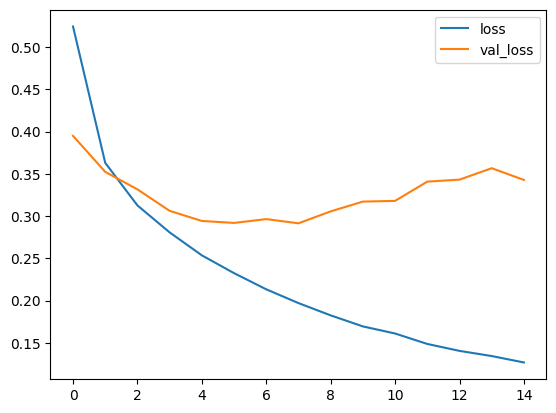

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
#val loss going up slightly indicates overfitting
#https://aws.amazon.com/what-is/overfitting/

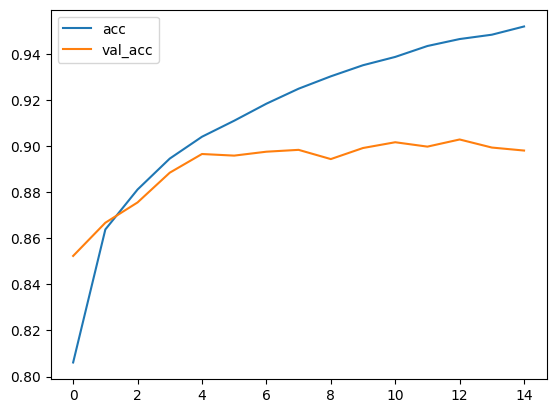

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()


313/313 [==============================] - 1s 3ms/step
Confusion matrix without normalization
[[856   2  15  25   3   1  93   0   5   0]
 [  3 972   1  15   2   0   6   0   1   0]
 [ 19   1 877   9  26   0  66   0   2   0]
 [ 18   3  22 916  23   1  17   0   0   0]
 [  1   0  92  26 781   0  99   0   1   0]
 [  0   0   0   0   0 970   0  22   1   7]
 [124   1  74  20  71   0 697   0  13   0]
 [  0   0   0   0   0   6   0 979   1  14]
 [  3   0   4   2   2   2   8   2 977   0]
 [  1   0   0   0   0   6   0  37   1 955]]


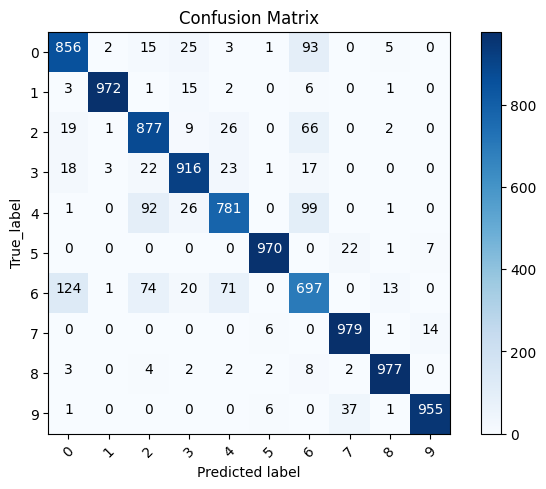

In [ ]:
#plot confusion matrix

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  #Function to print and plot confusion matrix
  #Normalization can be applied by setting normalize=True

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes,rotation=45)
  plt.yticks(tick_marks, classes)

  fmt='.2f' if normalize else 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j], fmt),
             horizontalalignment="center",
             color="white" if cm[i,j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True_label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))


In [ ]:
labels='''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

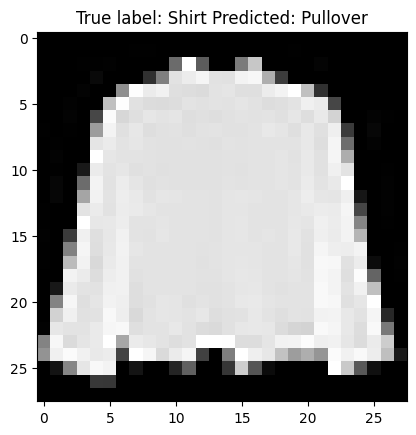

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));
